# Consumo de alcohol

Sabéis que nos preocupa mucho la salud de los ciudadanos. Por eso nos han encargado hacer un análisis sobre el consumo de alcohol.

Los datos de referencia los encontraréis aquí: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv

Nos interesa conocer el consumo de alcohol, por tipo de bebida alcohólica para los distintos continentes y países. Además, sabiendo que el vino y la cerveza son los sospechosos habituales, podéis disponer estadísticas sobre estos dos casos en particular. 

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos desde la URL proporcionada
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv"
drinks = pd.read_csv(url)

In [3]:
# Mostrar las primeras filas del DataFrame para entender su estructura
print(drinks.head())

       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU  
4                           5.9        AF  


In [5]:
# Análisis del consumo de cada tipo de bebida alcohólica por continente
alcohol_consumption_by_continent = drinks.groupby("continent")[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]].mean()

print("Consumo medio de cada tipo de bebida alcohólica por continente:")
print(alcohol_consumption_by_continent)

Consumo medio de cada tipo de bebida alcohólica por continente:
           beer_servings  spirit_servings  wine_servings  \
continent                                                  
AF             61.471698        16.339623      16.264151   
AS             37.045455        60.840909       9.068182   
EU            193.777778       132.555556     142.222222   
OC             89.687500        58.437500      35.625000   
SA            175.083333       114.750000      62.416667   

           total_litres_of_pure_alcohol  
continent                                
AF                             3.007547  
AS                             2.170455  
EU                             8.617778  
OC                             3.381250  
SA                             6.308333  


In [6]:
# Estadísticas específicas para el consumo de cerveza y vino por continente 
beer_wine_consumption_by_continent = drinks.groupby("continent")[["beer_servings", "wine_servings"]].describe()

print("\nEstadísticas específicas para el consumo de cerveza y vino por continente:")
print(beer_wine_consumption_by_continent) 


Estadísticas específicas para el consumo de cerveza y vino por continente:
          beer_servings                                                      \
                  count        mean        std   min     25%    50%     75%   
continent                                                                     
AF                 53.0   61.471698  80.557816   0.0   15.00   32.0   76.00   
AS                 44.0   37.045455  49.469725   0.0    4.25   17.5   60.50   
EU                 45.0  193.777778  99.631569   0.0  127.00  219.0  270.00   
OC                 16.0   89.687500  96.641412   0.0   21.00   52.5  125.75   
SA                 12.0  175.083333  65.242845  93.0  129.50  162.5  198.00   

                 wine_servings                                           \
             max         count        mean        std  min   25%    50%   
continent                                                                 
AF         376.0          53.0   16.264151  38.846419  0.0   1.0  

In [8]:
# Graficar los resultados
# Configuración de los gráficos
sns.set(style="whitegrid") 

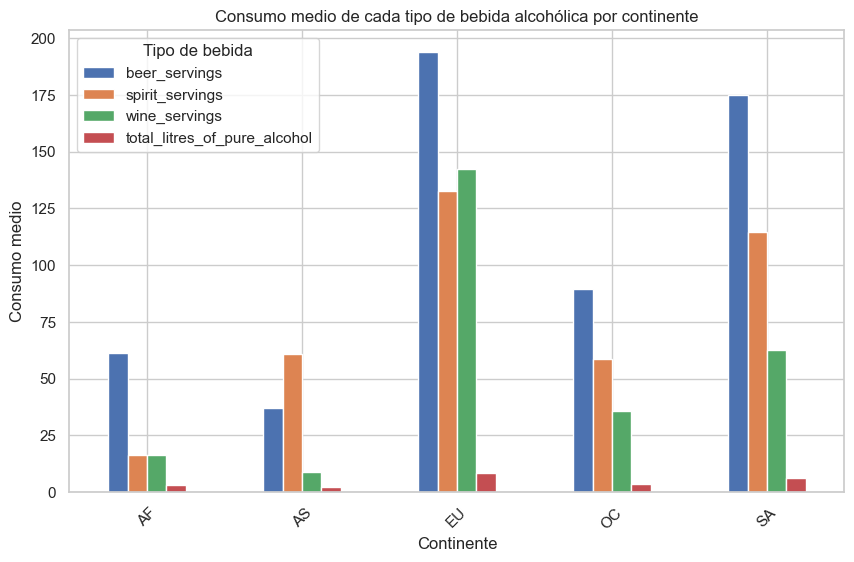

In [9]:
# Gráfico del consumo medio de cada tipo de bebida alcohólica por continente
alcohol_consumption_by_continent.plot(kind='bar', figsize=(10, 6))
plt.title('Consumo medio de cada tipo de bebida alcohólica por continente')
plt.xlabel('Continente')
plt.ylabel('Consumo medio')
plt.xticks(rotation=45)
plt.legend(title='Tipo de bebida')
plt.show()

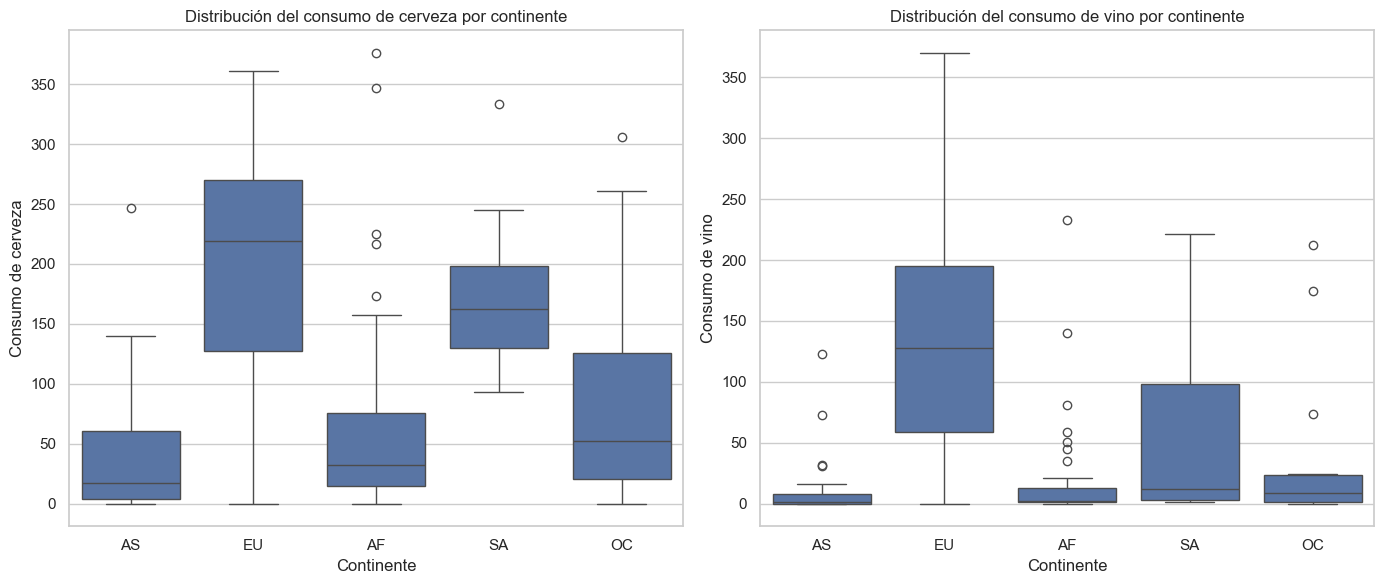

In [11]:
# Gráfico de las estadísticas específicas para el consumo de cerveza y vino por continente
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='continent', y='beer_servings', data=drinks, ax=axes[0])
axes[0].set_title('Distribución del consumo de cerveza por continente')
axes[0].set_xlabel('Continente')
axes[0].set_ylabel('Consumo de cerveza') 

sns.boxplot(x='continent', y='wine_servings', data=drinks, ax=axes[1])
axes[1].set_title('Distribución del consumo de vino por continente')
axes[1].set_xlabel('Continente')
axes[1].set_ylabel('Consumo de vino')

plt.tight_layout()
plt.show()